In [ ]:
import pickle
import os


my_news_file = './newsgroups'

if os.path.exists(my_news_file):

    with open(my_news_file, 'rb') as f:
        all_articles = pickle.load(f)


    print(type(all_articles))
    print(all_articles[:2])
else:
    print(f"Error: File not found at {my_news_file}")

<class 'list'>
["The best group to keep you informed is the Crohn's and Colitis Foundation\nof America.  I do not know if the UK has a similar organization.  The\naddress of\nthe CCFA is \n\nCCFA\n444 Park Avenue South\n11th Floor\nNew York, NY  10016-7374\nUSA\n\nThey have a lot of information available and have a number of newsletters.\n \nGood Luck.", '%>I dunno, Lemieux?  Hmmm...sounds like he\n%>has *French* blood in him!!!  Hey!  France is part of Europe!  Send that\n%>Euro-blooded boy back!!!\n%\n% Don\'t you Americans study history...the French settled in North America\n% as early or before the British...Lemieux can probably trace back his\n% North American heritage back a lot further than most of us.\n\n\n<friendly-jibe mode on>\n\nDon\'t you Canadians understand sarcasm?  Sometimes the reader must\ndecide that what he\'s reading is so ludicrous that it must mean\nthe opposite of what it said...\n\nKinda like the "Toronto\'s going to win the Cup" posts.  Yeah.  Right.\nAnd cow

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

my_stopwords = set(stopwords.words('english'))
my_lemmatizer = WordNetLemmatizer()

def make_it_clean(doc):
    doc = doc.lower()
    doc = re.sub(r'[^\w\s]', '', doc)
    doc = ' '.join([my_lemmatizer.lemmatize(word)
                    for word in doc.split()
                    if word not in my_stopwords and word.isalpha()])
    return doc

my_clean_articles = [make_it_clean(doc) for doc in all_articles]
print(my_clean_articles[:2])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


['best group keep informed crohn colitis foundation america know uk similar organization address ccfa ccfa park avenue south floor new york ny usa lot information available number newsletter good luck', 'dunno lemieux hmmmsounds like french blood hey france part europe send euroblooded boy back dont american study historythe french settled north america early britishlemieux probably trace back north american heritage back lot u friendlyjibe mode dont canadian understand sarcasm sometimes reader must decide he reading ludicrous must mean opposite said kinda like toronto going win cup post yeah right cow fly friendlyjibe mode geez gerald like anyone reading recflamefesthockeypensaregreat didnt know lemow quebec']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

my_counter = CountVectorizer(max_df=0.95, min_df=2, my_stopwords='english')
bag_of_words_data = my_counter.fit_transform(my_clean_articles)

my_tfidf_machine = TfidfVectorizer(max_df=0.95, min_df=2, my_stopwords='english')
tfidf_matrix = my_tfidf_machine.fit_transform(my_clean_articles)


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

my_lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
my_lda_model.fit(bag_of_words_data)


LatentDirichletAllocation(random_state=42)

In [ ]:
from sklearn.decomposition import NMF

my_nmf_model = NMF(n_components=10, random_state=42)
my_nmf_model.fit(tfidf_matrix)


NMF(n_components=10, random_state=42)

In [ ]:
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words-1:-1]]))
        print()

print("LDA Topics:")
display_topics(my_lda_model, my_counter.get_feature_names_out())

print("NMF Topics:")
display_topics(my_nmf_model, my_tfidf_machine.get_feature_names_out())


LDA Topics:
Topic #1:
god people think argument atheist dont say religion believe posting

Topic #2:
dont think like people know center problem time thing cancer

Topic #3:
game team play run goal period season new win second

Topic #4:
space data time nasa list mission like shuttle launch orbit

Topic #5:
drive disk card use controller hard thanks problem mac monitor

Topic #6:
dont year good bike think im know lot say make

Topic #7:
game year team player win la gm play leaf dont

Topic #8:
work want simms power tool problem know break time like

Topic #9:
car like good time dont oil bike brake im way

Topic #10:
car im ground year dont available like price problem current

NMF Topics:
Topic #1:
dont think people thing time good problem like say way

Topic #2:
card controller port bus serial pc ide board slot modem

Topic #3:
game team year player win play season hockey league leaf

Topic #4:
gebcadredslpittedu skepticism shameful chastity intellect surrender gordon bank soon patient

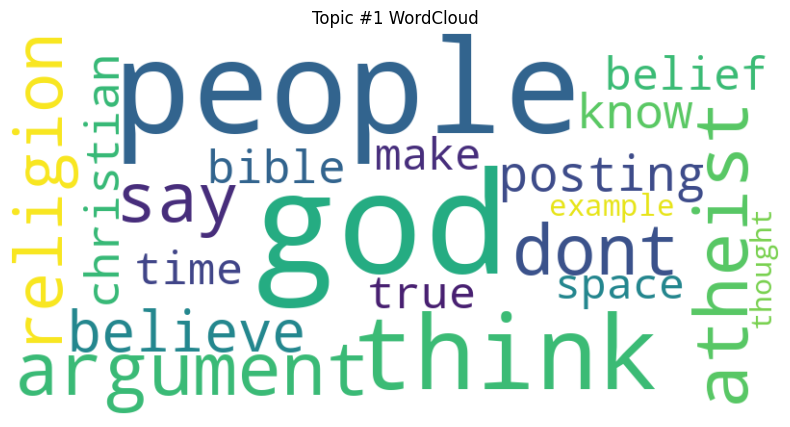

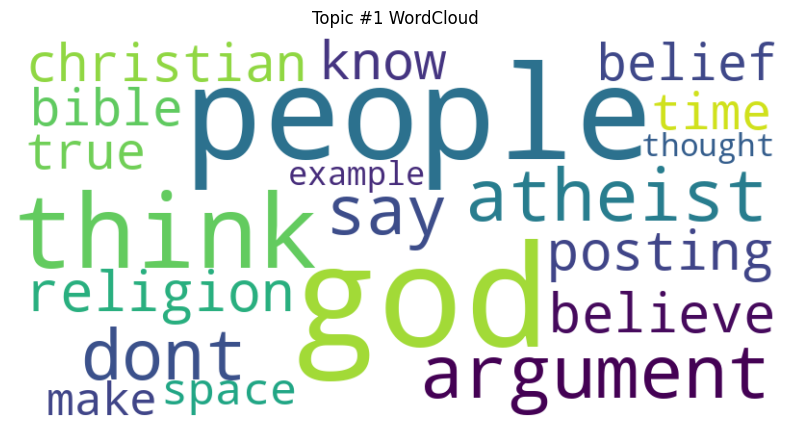

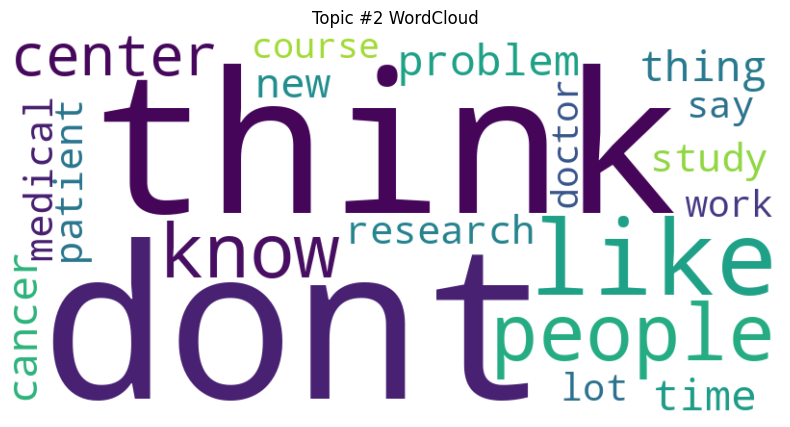

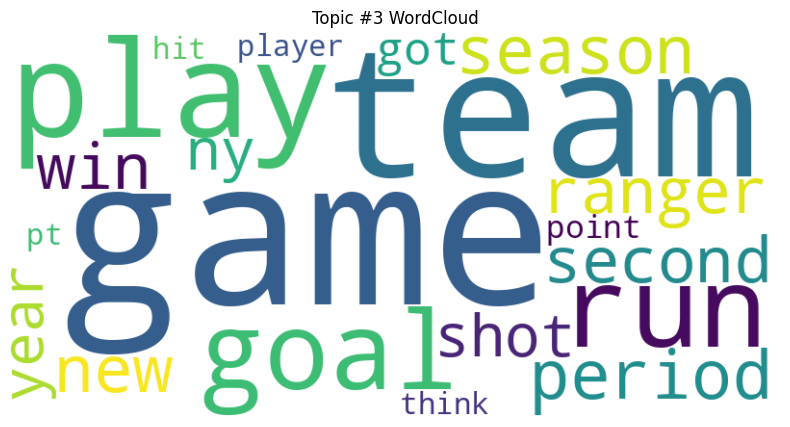

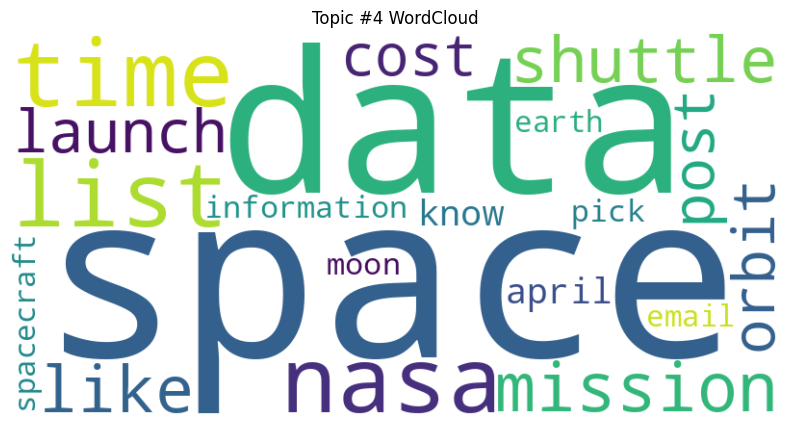

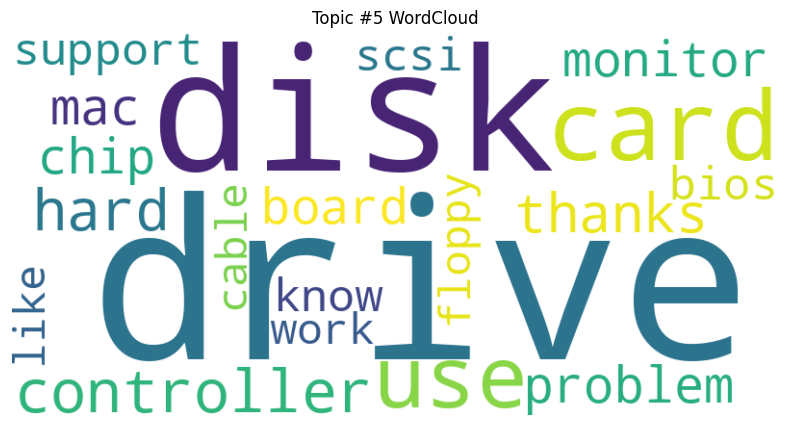

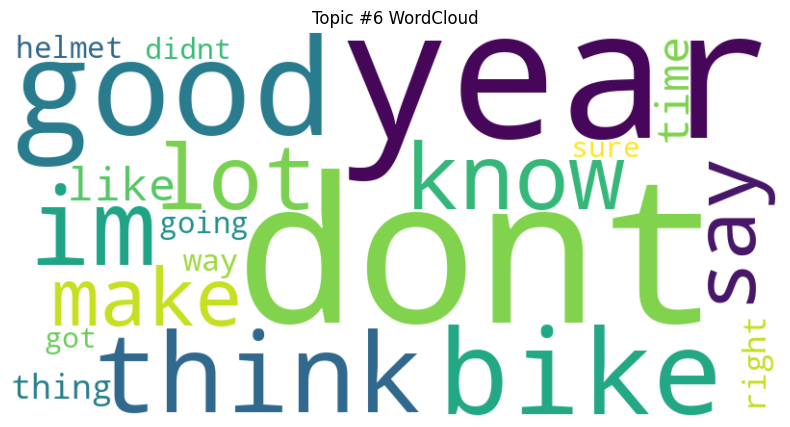

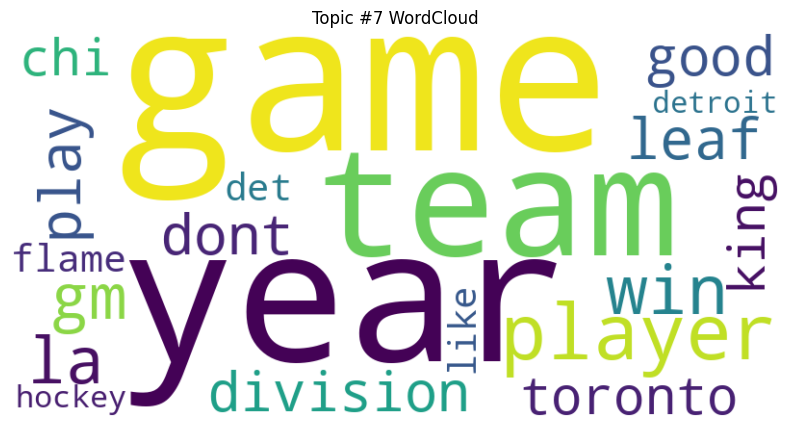

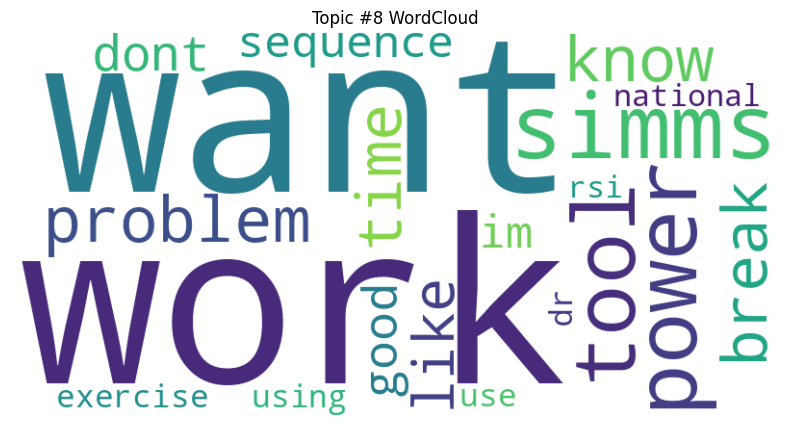

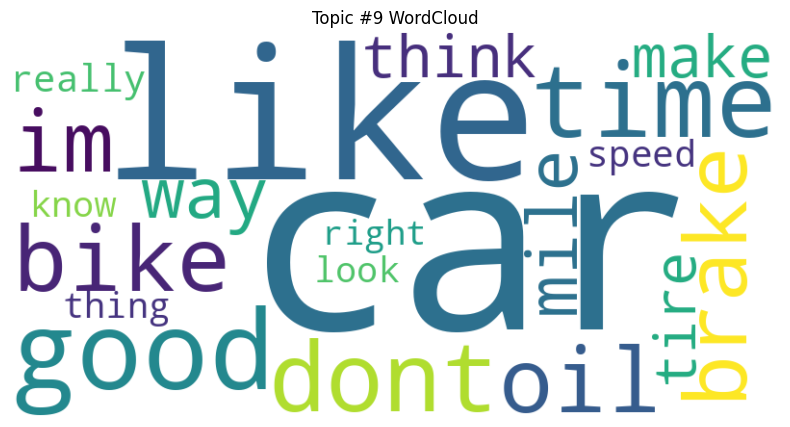

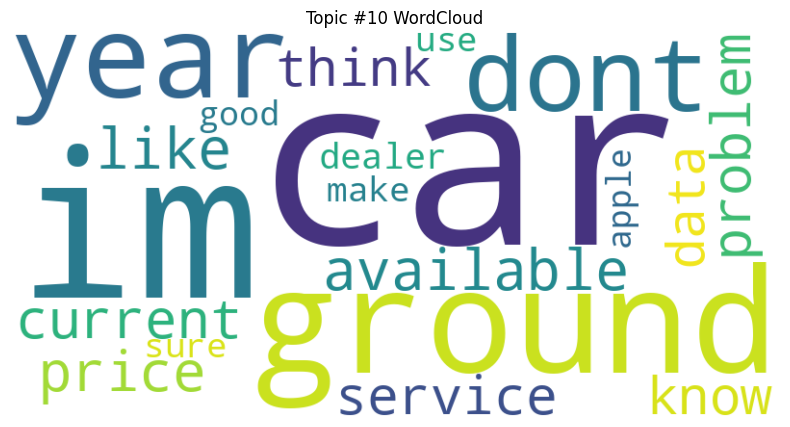

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(model, feature_names, topic_idx):
    topic_words = {feature_names[i]: model.components_[topic_idx][i] for i in model.components_[topic_idx].argsort()[:-21:-1]}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic #{topic_idx+1} WordCloud")
    plt.show()

plot_wordcloud(my_lda_model, my_counter.get_feature_names_out(), topic_idx=0)

for i in range(10):
    plot_wordcloud(my_lda_model, my_counter.get_feature_names_out(), i)
